In [1]:
import os
os.chdir("..")

In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt

x = torch.tensor([
    [1,1,1,1,0],
    [1,0,0,0,1],
    [1,1,1,1,0],
    [1,0,0,0,1],
    [1,0,0,0,1],
]) * -1 + 1

y = torch.tensor([
    [0,1,1,1,0],
    [1,0,0,0,1],
    [0,1,1,1,1],
    [0,0,0,0,1],
    [1,1,1,1,0],
]) * -1 + 1

X = torch.stack((x,y))
X = X.unsqueeze(1)
print(X.shape)

torch.Size([2, 1, 5, 5])


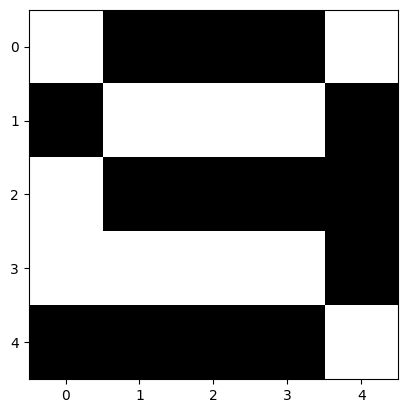

In [3]:
plt.imshow(X[1,...].squeeze(0).numpy(), cmap="gray")

tensor([[[0, 1, 1, 0, 1],
         [0, 1, 0, 1, 0],
         [0, 1, 0, 1, 0],
         [0, 1, 0, 1, 0],
         [1, 0, 0, 0, 1]]])


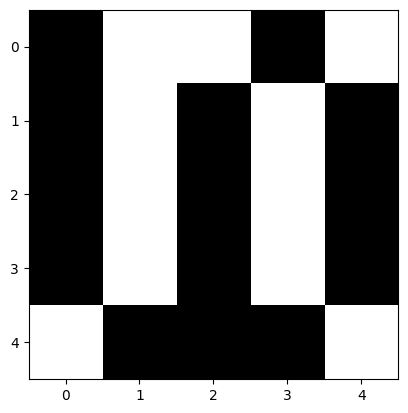

In [4]:
X_90 = torch.rot90(X, -1, dims=(2,3))

print(X_90[1,...])

plt.imshow(X_90[1,...].squeeze(0).numpy(), cmap="gray")

In [5]:
v = torch.tensor([[1,2], [3,4], [5,6]])
w = torch.tensor([[7,8], [9,10], [11,12]])
print(v.shape)
stacked = torch.stack((v,w), dim=1)
print(stacked.shape)
interleaved = torch.flatten(stacked, start_dim=0, end_dim=1)
print(interleaved.shape)
print(interleaved)

torch.Size([3, 2])
torch.Size([3, 2, 2])
torch.Size([6, 2])
tensor([[ 1,  2],
        [ 7,  8],
        [ 3,  4],
        [ 9, 10],
        [ 5,  6],
        [11, 12]])


In [6]:
X_90 = torch.rot90(X, -1, dims=(2,3))
X_180 = torch.rot90(X, -2, dims=(2,3))
X_270 = torch.rot90(X, -3, dims=(2,3))



# Interleaving Tensor with B,C,H,W
stacked = torch.stack((X, X_90, X_180, X_270), dim=1)
print(stacked.shape)
interleaved = torch.flatten(stacked, start_dim=0, end_dim=1)
print(interleaved.shape)

torch.Size([2, 4, 1, 5, 5])
torch.Size([8, 1, 5, 5])


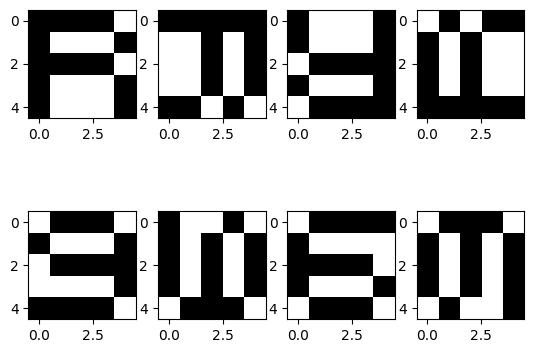

In [7]:
# Plot all images

fig, axs = plt.subplots(2, 4)
for i in range(8):
    axs[i//4, i%4].imshow(interleaved[i,...].squeeze(0).numpy(), cmap="gray")

plt.show()

torch.Size([2, 4, 1, 5, 5])


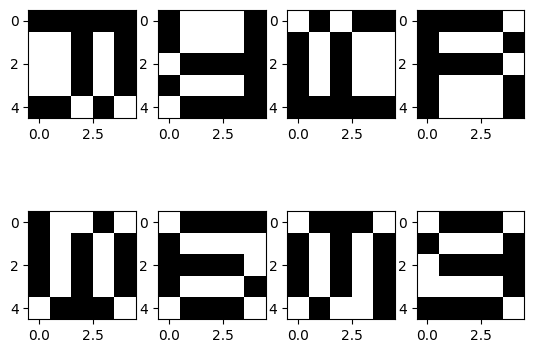

In [8]:
# Cycle the images in the batch dimension so that
# [X0, X90, X180, X270] -> [X90, X180, X270, X0]
# [Y0, Y90, Y180, Y270] -> [Y90, Y180, Y270, Y0]
c_interleaved = interleaved.view(2, 4, 1, 5, 5)
print(c_interleaved.shape)
cycle = torch.roll(c_interleaved, -1, dims=1)

cycle = cycle.flatten(start_dim=0, end_dim=1)


fig, axs = plt.subplots(2, 4)
for i in range(8):
    axs[i//4, i%4].imshow(cycle[i,...].squeeze(0).numpy(), cmap="gray")

plt.show()

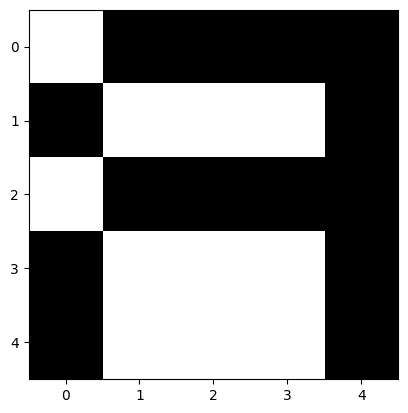

In [9]:
# Reflect the images
X_reflect = torch.flip(X, dims=(3,))
plt.imshow(X_reflect[0,...].squeeze(0).numpy(), cmap="gray")

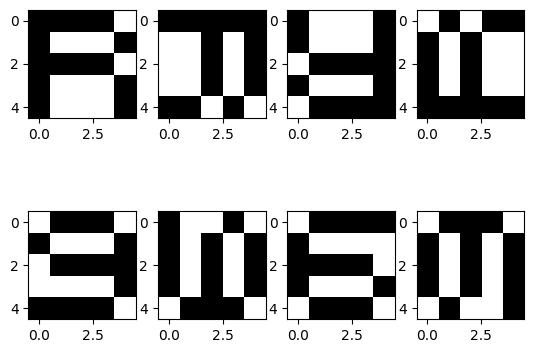

In [10]:
from src import C4_Slice, C4_Cyclic_Permutation, C4_Pool, C4_Stack, C4_Roll

cs = C4_Slice()

Xp = cs(X)
# Plot all images

fig, axs = plt.subplots(2, 4)
for i in range(8):
    axs[i//4, i%4].imshow(Xp[i,...].squeeze(0).numpy(), cmap="gray")

plt.show()

C:\Users\alec\AppData\Local\Temp\ipykernel_7756\637013436.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  Xpp = cp(torch.tensor(Xp,dtype=torch.float32))


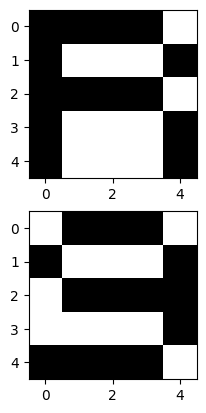

In [11]:
cp = C4_Pool()
Xpp = cp(torch.tensor(Xp,dtype=torch.float32))
# Plot all images
fig, axs = plt.subplots(2)
for i in range(2):
    axs[i].imshow(Xpp[i,...].squeeze(0).numpy(), cmap="gray")


plt.show()

C:\Users\alec\AppData\Local\Temp\ipykernel_7756\1883009834.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  Xs = cs(torch.tensor(Xp,dtype=torch.float32))


torch.Size([2, 4, 5, 5])


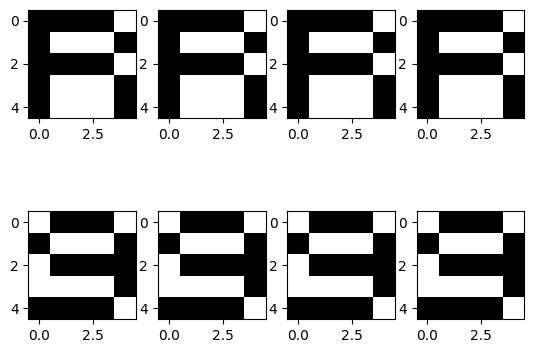

In [12]:
cs = C4_Stack()
Xs = cs(torch.tensor(Xp,dtype=torch.float32))
print(Xs.shape)
Xs = Xs.view(8,1,5,5)
fig, axs = plt.subplots(2, 4)
for i in range(8):
    axs[i//4, i%4].imshow(Xs[i,...].squeeze(0).numpy(), cmap="gray")

C:\Users\alec\AppData\Local\Temp\ipykernel_7756\2375225287.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  Xs = cs(torch.tensor(Xp,dtype=torch.float32))
C:\Users\alec\AppData\Local\Temp\ipykernel_7756\2375225287.py:15: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  Xs = cs(torch.tensor(Xp,dtype=torch.float32))
C:\Users\alec\AppData\Local\Temp\ipykernel_7756\2375225287.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  Xs = cs(torch.tensor(Xp,dtype=torch.float32))


torch.Size([2, 4, 5, 5])


C:\Users\alec\AppData\Local\Temp\ipykernel_7756\2375225287.py:29: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  Xs = cs(torch.tensor(Xp,dtype=torch.float32))


torch.Size([8, 4, 5, 5])


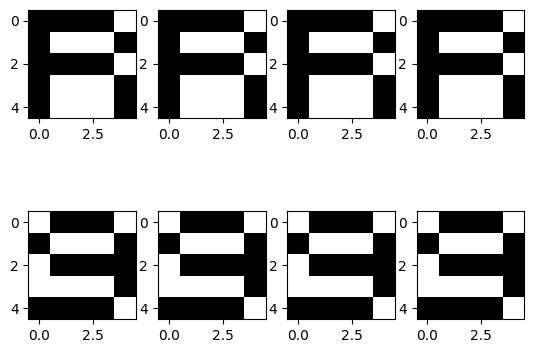

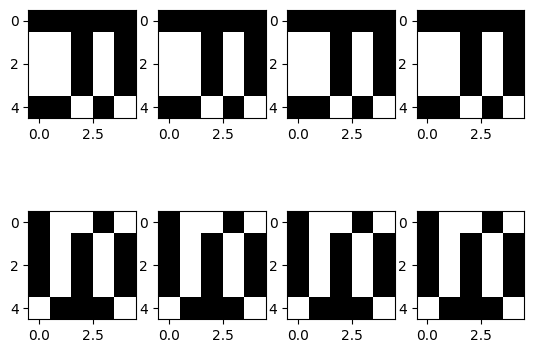

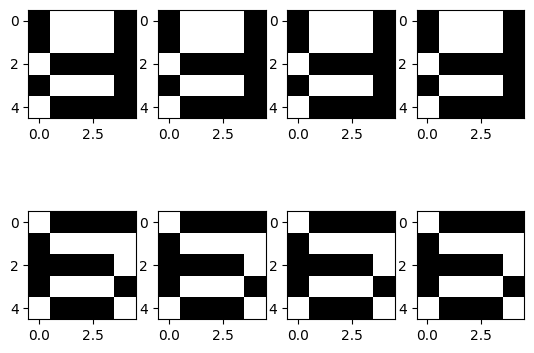

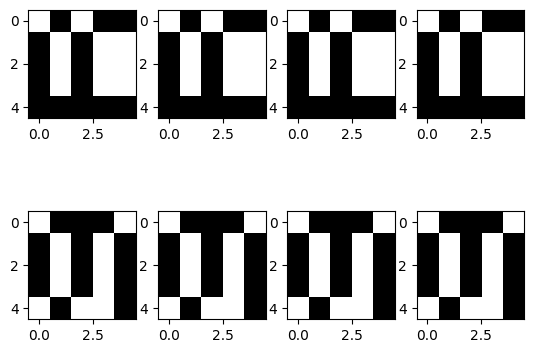

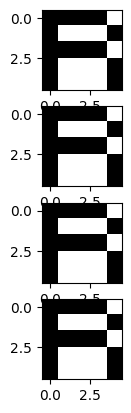

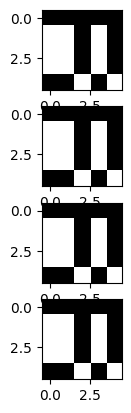

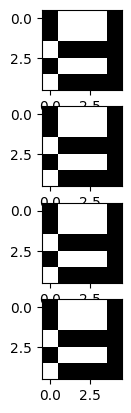

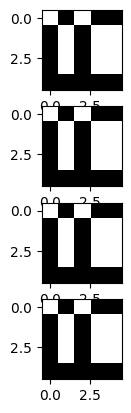

In [14]:
csl = C4_Slice()
ccp = C4_Cyclic_Permutation()

Xp = csl(X)

cs = C4_Stack()
Xs = cs(torch.tensor(Xp,dtype=torch.float32))
print(Xs.shape)
Xs = Xs.view(8,1,5,5)
fig, axs = plt.subplots(2, 4)
for i in range(8):
    axs[i//4, i%4].imshow(Xs[i,...].squeeze(0).numpy(), cmap="gray")

Xp = ccp(csl(X))
Xs = cs(torch.tensor(Xp,dtype=torch.float32))
Xs = Xs.view(8,1,5,5)
fig, axs = plt.subplots(2, 4)
for i in range(8):
    axs[i//4, i%4].imshow(Xs[i,...].squeeze(0).numpy(), cmap="gray")

Xp = ccp(ccp(csl(X)))
Xs = cs(torch.tensor(Xp,dtype=torch.float32))
Xs = Xs.view(8,1,5,5)
fig, axs = plt.subplots(2, 4)
for i in range(8):
    axs[i//4, i%4].imshow(Xs[i,...].squeeze(0).numpy(), cmap="gray")

Xp = ccp(ccp(ccp(csl(X))))
Xs = cs(torch.tensor(Xp,dtype=torch.float32))
Xs = Xs.view(8,1,5,5)
fig, axs = plt.subplots(2, 4)
for i in range(8):
    axs[i//4, i%4].imshow(Xs[i,...].squeeze(0).numpy(), cmap="gray")

Xp = csl(X)
Xr = C4_Roll()(Xp)

print(Xr.shape)

Xs0 = Xr[0,...].unsqueeze(1)
Xs1 = Xr[1,...].unsqueeze(1)
Xs2 = Xr[2,...].unsqueeze(1)
Xs3 = Xr[3,...].unsqueeze(1)
fig, axs = plt.subplots(4)
for i in range(4):
    axs[i].imshow(Xs0[i,...].squeeze(0).numpy(), cmap="gray")


fig, axs = plt.subplots(4)
for i in range(4):
    axs[i].imshow(Xs1[i,...].squeeze(0).numpy(), cmap="gray")


fig, axs = plt.subplots(4)
for i in range(4):
    axs[i].imshow(Xs2[i,...].squeeze(0).numpy(), cmap="gray")


fig, axs = plt.subplots(4)
for i in range(4):
    axs[i].imshow(Xs3[i,...].squeeze(0).numpy(), cmap="gray")

torch.Size([8, 4, 5, 5])


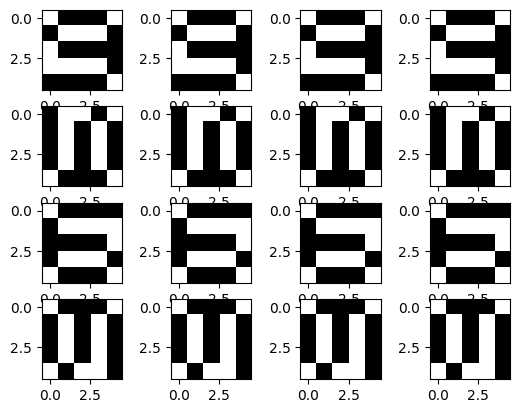

In [14]:
cr = C4_Roll()

Xrr = cr(Xp)

print(Xrr.shape)
Xrr = Xrr.view(2, 4, 4, 5, 5)

# Plot all images
fig, axs = plt.subplots(4, 4)
for i in range(16):
    axs[i//4, i%4].imshow(Xrr[1, i//4,i%4,...].squeeze(0).numpy(), cmap="gray")

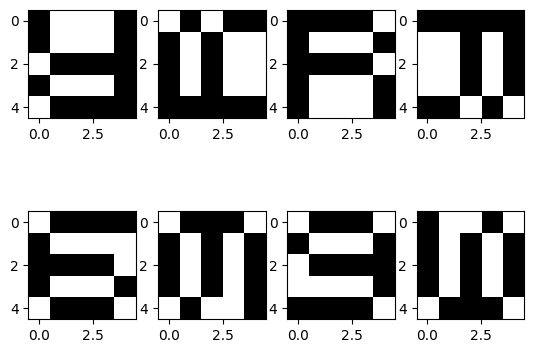

In [15]:
ccp = C4_Cyclic_Permutation()
Xpk = ccp(Xp, 2)

# Plot all images

fig, axs = plt.subplots(2, 4)
for i in range(8):
    axs[i//4, i%4].imshow(Xpk[i,...].squeeze(0).numpy(), cmap="gray")

plt.show()

C:\Users\alec\AppData\Local\Temp\ipykernel_6952\3660333412.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  temp = torch.tensor(Xp, dtype=torch.float32).view(2,4,1,5,5)


torch.Size([2, 4, 1, 5, 5])


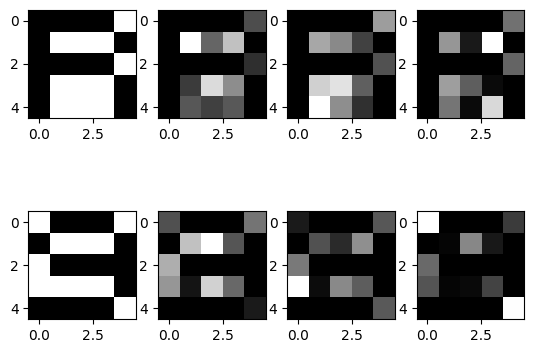

torch.Size([2, 1, 5, 5])


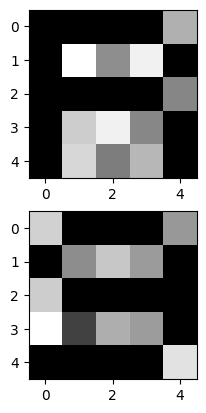

tensor([[[[0.0000, 0.0000, 0.0000, 0.0000, 3.6239],
          [0.0000, 5.2498, 2.9200, 4.9449, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 2.7542],
          [0.0000, 4.2189, 4.9567, 2.7776, 0.0000],
          [0.0000, 4.4196, 2.5658, 3.7574, 0.0000]]],


        [[[4.0101, 0.0000, 0.0000, 0.0000, 2.9180],
          [0.0000, 2.7060, 3.8220, 2.9862, 0.0000],
          [3.9400, 0.0000, 0.0000, 0.0000, 0.0000],
          [4.9116, 1.2625, 3.3423, 3.0002, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 4.3537]]]])


In [16]:
temp = torch.tensor(Xp, dtype=torch.float32).view(2,4,1,5,5)
print(temp.shape)

temp[:, 1, ...] = torch.rot90(temp[:, 1, ...], 1, dims=(2,3)) * torch.abs(torch.randn(2,1,5,5))

temp[:, 2, ...] = torch.rot90(temp[:, 2, ...], 2, dims=(2,3)) * torch.abs(torch.randn(2,1,5,5))

temp[:, 3, ...] = torch.rot90(temp[:, 3, ...], 3, dims=(2,3)) * torch.abs(torch.randn(2,1,5,5))



# Plot all images
temp = temp.view(8,1,5,5)
fig, axs = plt.subplots(2, 4)
for i in range(8):
    axs[i//4, i%4].imshow(temp[i,...].squeeze(0).numpy(), cmap="gray")

plt.show()



temp = temp.view(2,4,1,5,5)
temp = temp.sum(dim=1)
print(temp.shape)
temp = temp.view(2,1,5,5)

# Plot all images
fig, axs = plt.subplots(2)
for i in range(2):
    axs[i].imshow(temp[i,...].squeeze(0).numpy(), cmap="gray")


plt.show()

print(temp)